## Lab Cleaning Numerical Data
1. Import the necessary libraries.
2. Load the customer_value_analysis.csv into the variable customer_df.
3. First look at its main features (head, shape, info).
4. Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores).
5. Change the type of effective_to_date column to DateTime format.
6. Check NaN values per column.
7. Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.
8. Drop any ID column.
9. Get the correlation matrix for the numerical variables. What is the pair of numerical variables that have the highest correlation? It makes sense, why?
10. Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.
11. Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).
12. Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)
13. According to the previous histogram plots, do you think that you will have to apply any transformation?
14. Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer_df = pd.read_csv('files_for_lab/customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
# Checking shape

customer_df.shape

(9134, 24)

In [4]:
# Checking info

customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
# Renaming columns

new_cols = []

for col in customer_df.columns:
    new_cols.append(col.lower().replace(' ', '_'))

customer_df.columns = new_cols
    
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [6]:
# Changing effective_to_date to date format

customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], format='%m/%d/%y')
customer_df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [7]:
# Checking for nulls

customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [8]:
# Defining function to split dataframe into numerical and categorical df

def df_dtype_split(df: pd.DataFrame) -> pd.DataFrame:
    '''
    Takes a dataframe, splits it into numerical and categorical columns and returns both of them.
    '''
    df_num = df.select_dtypes(include='number')
    df_cat = df.select_dtypes(include='object')
    return df_num, df_cat

customer_df_num, customer_df_cat = df_dtype_split(customer_df)
display(customer_df_num.head())
display(customer_df_cat.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [9]:
# Dropping id column

customer_df_cat.drop(columns='customer', inplace=True)
customer_df_cat.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

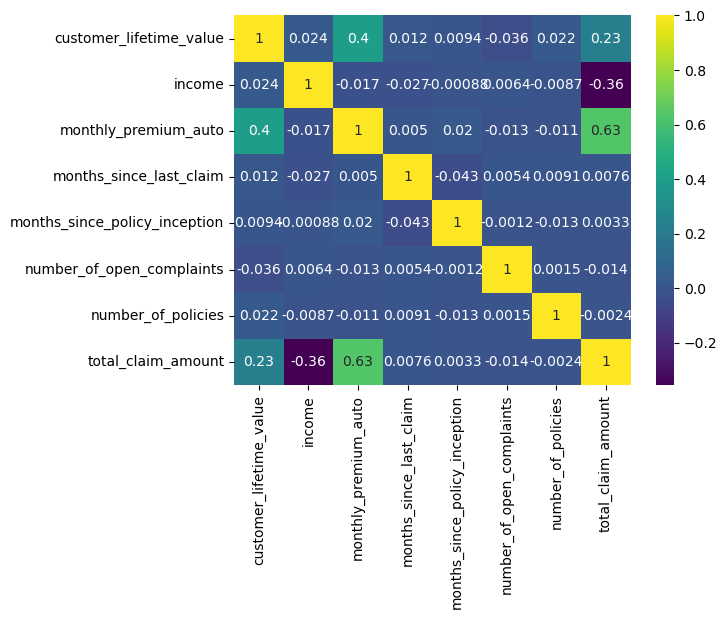

In [10]:
# Correlation matrix for numerical variables

corr_matrix = sns.heatmap(customer_df_num.corr(), cmap='viridis', annot=True)

In [11]:
# Defining function to split numerical df into discrete/continuous

def df_numerical_split(df: pd.DataFrame, threshold: int=36) -> pd.DataFrame:
    '''
    Takes a dataframe with numerical columns, and splits it into discrete and continuous based on the number (threshold)
    of unique values of the columns.
    Returns discrete and continuous dataframes.
    '''
    disc = []
    cont = []
    for col in df.columns:
        if df[col].nunique() > threshold:
            cont.append(col)
        else:
            disc.append(col)
    continuous_df = df[cont]
    discrete_df = df[disc]
    return continuous_df, discrete_df

continuous_df, discrete_df = df_numerical_split(customer_df_num)

display(continuous_df.head())
display(discrete_df.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879


,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1


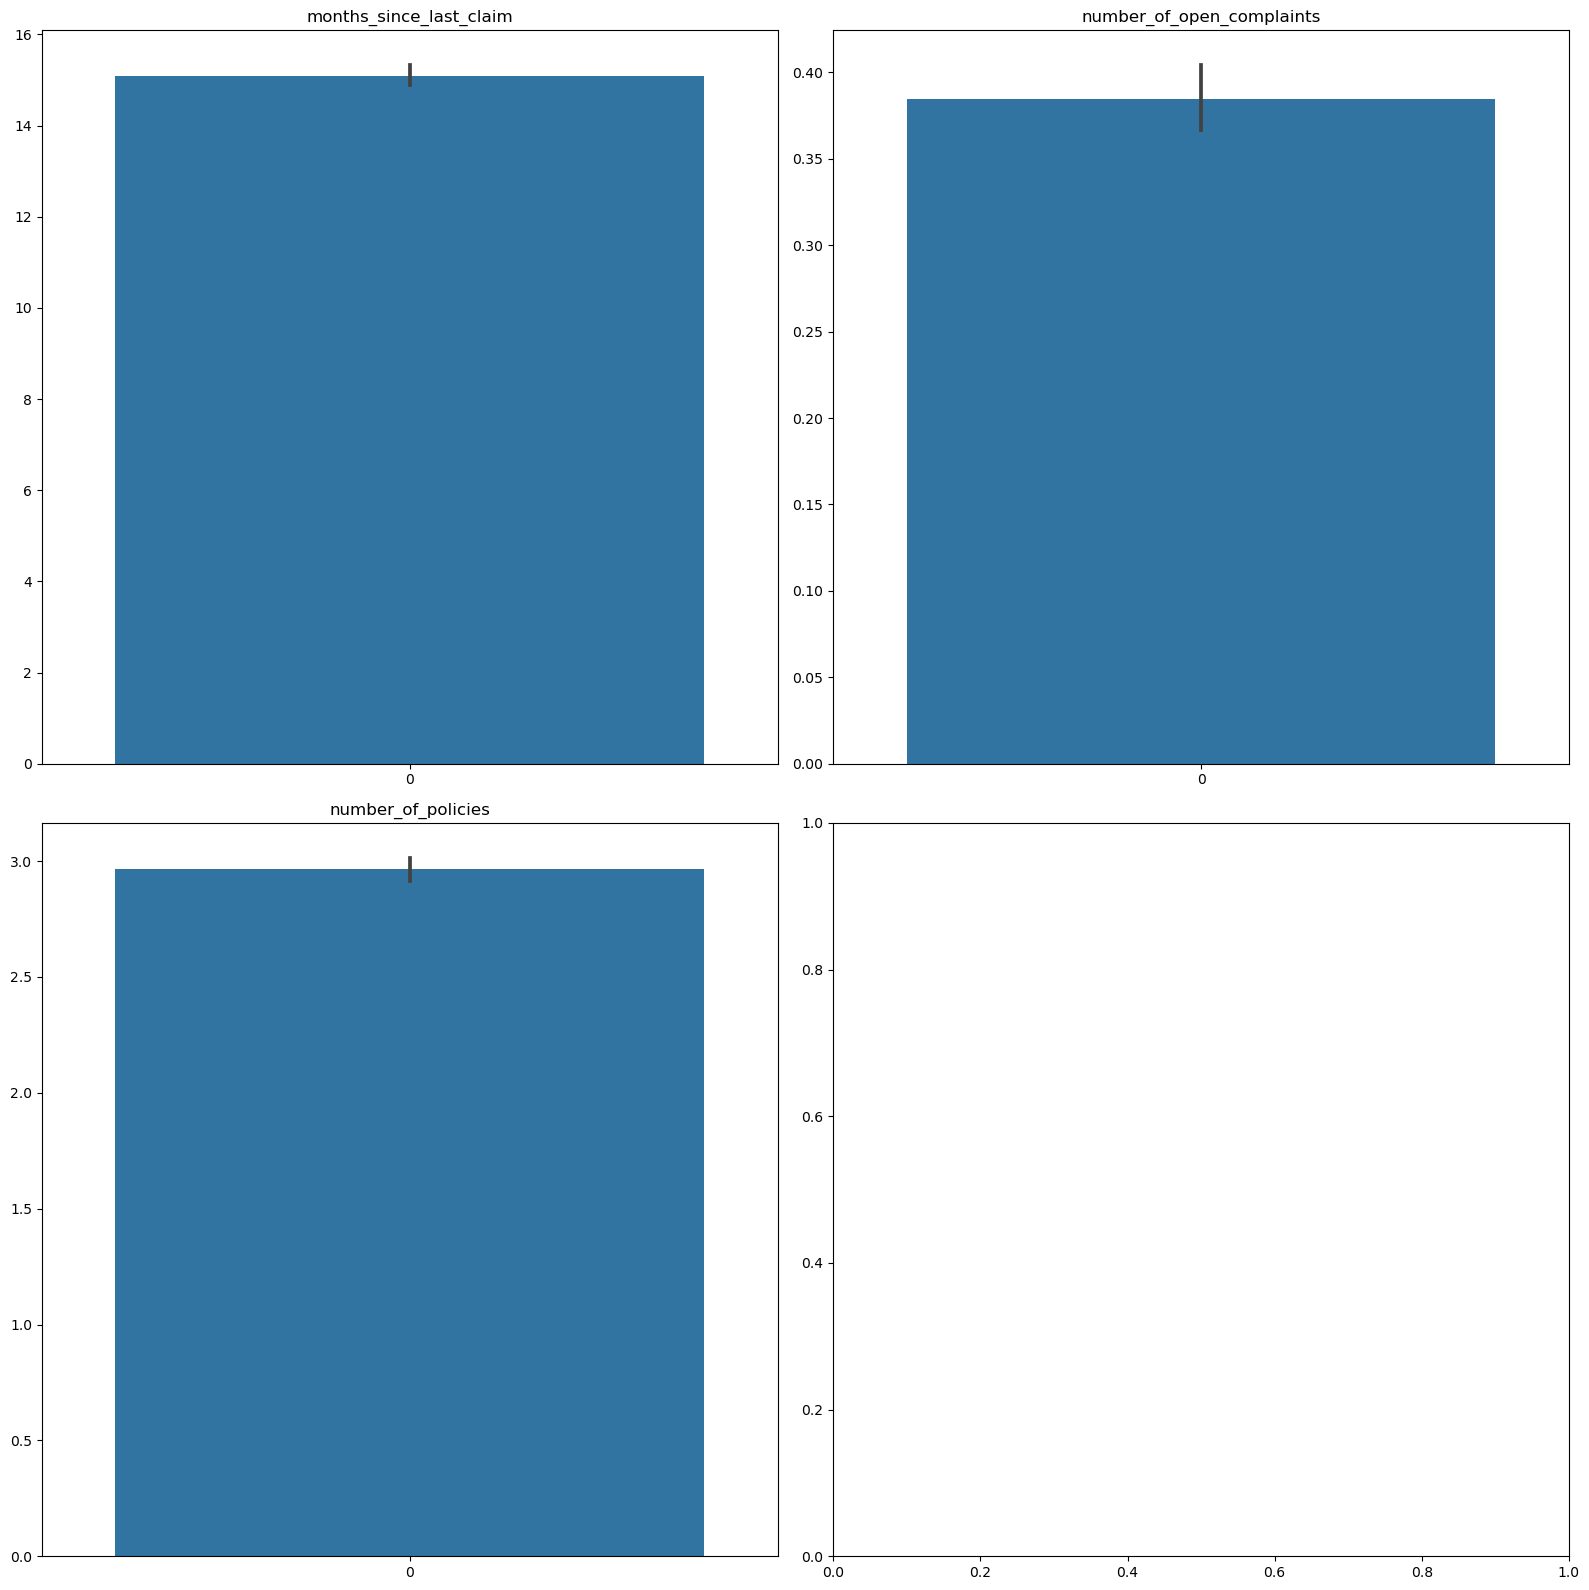

In [12]:
# Function to create a barplot for all cols in the discrete df

def barplot_discrete(df: pd.DataFrame=discrete_df):
    '''
    Takes a dataframe and creates a barplot for each column.
    '''
    num_cols = df.shape[1]
    num_rows = num_cols // 2 + 1
    fig, axes = plt.subplots(num_rows, 2, figsize=(16, 16))
    axes = axes.flatten()
    for i, col in enumerate(df.columns):
        sns.barplot(df[col], ax=axes[i])
        axes[i].set_title(col)
    plt.tight_layout()
    plt.show()
        
barplot_discrete(discrete_df)

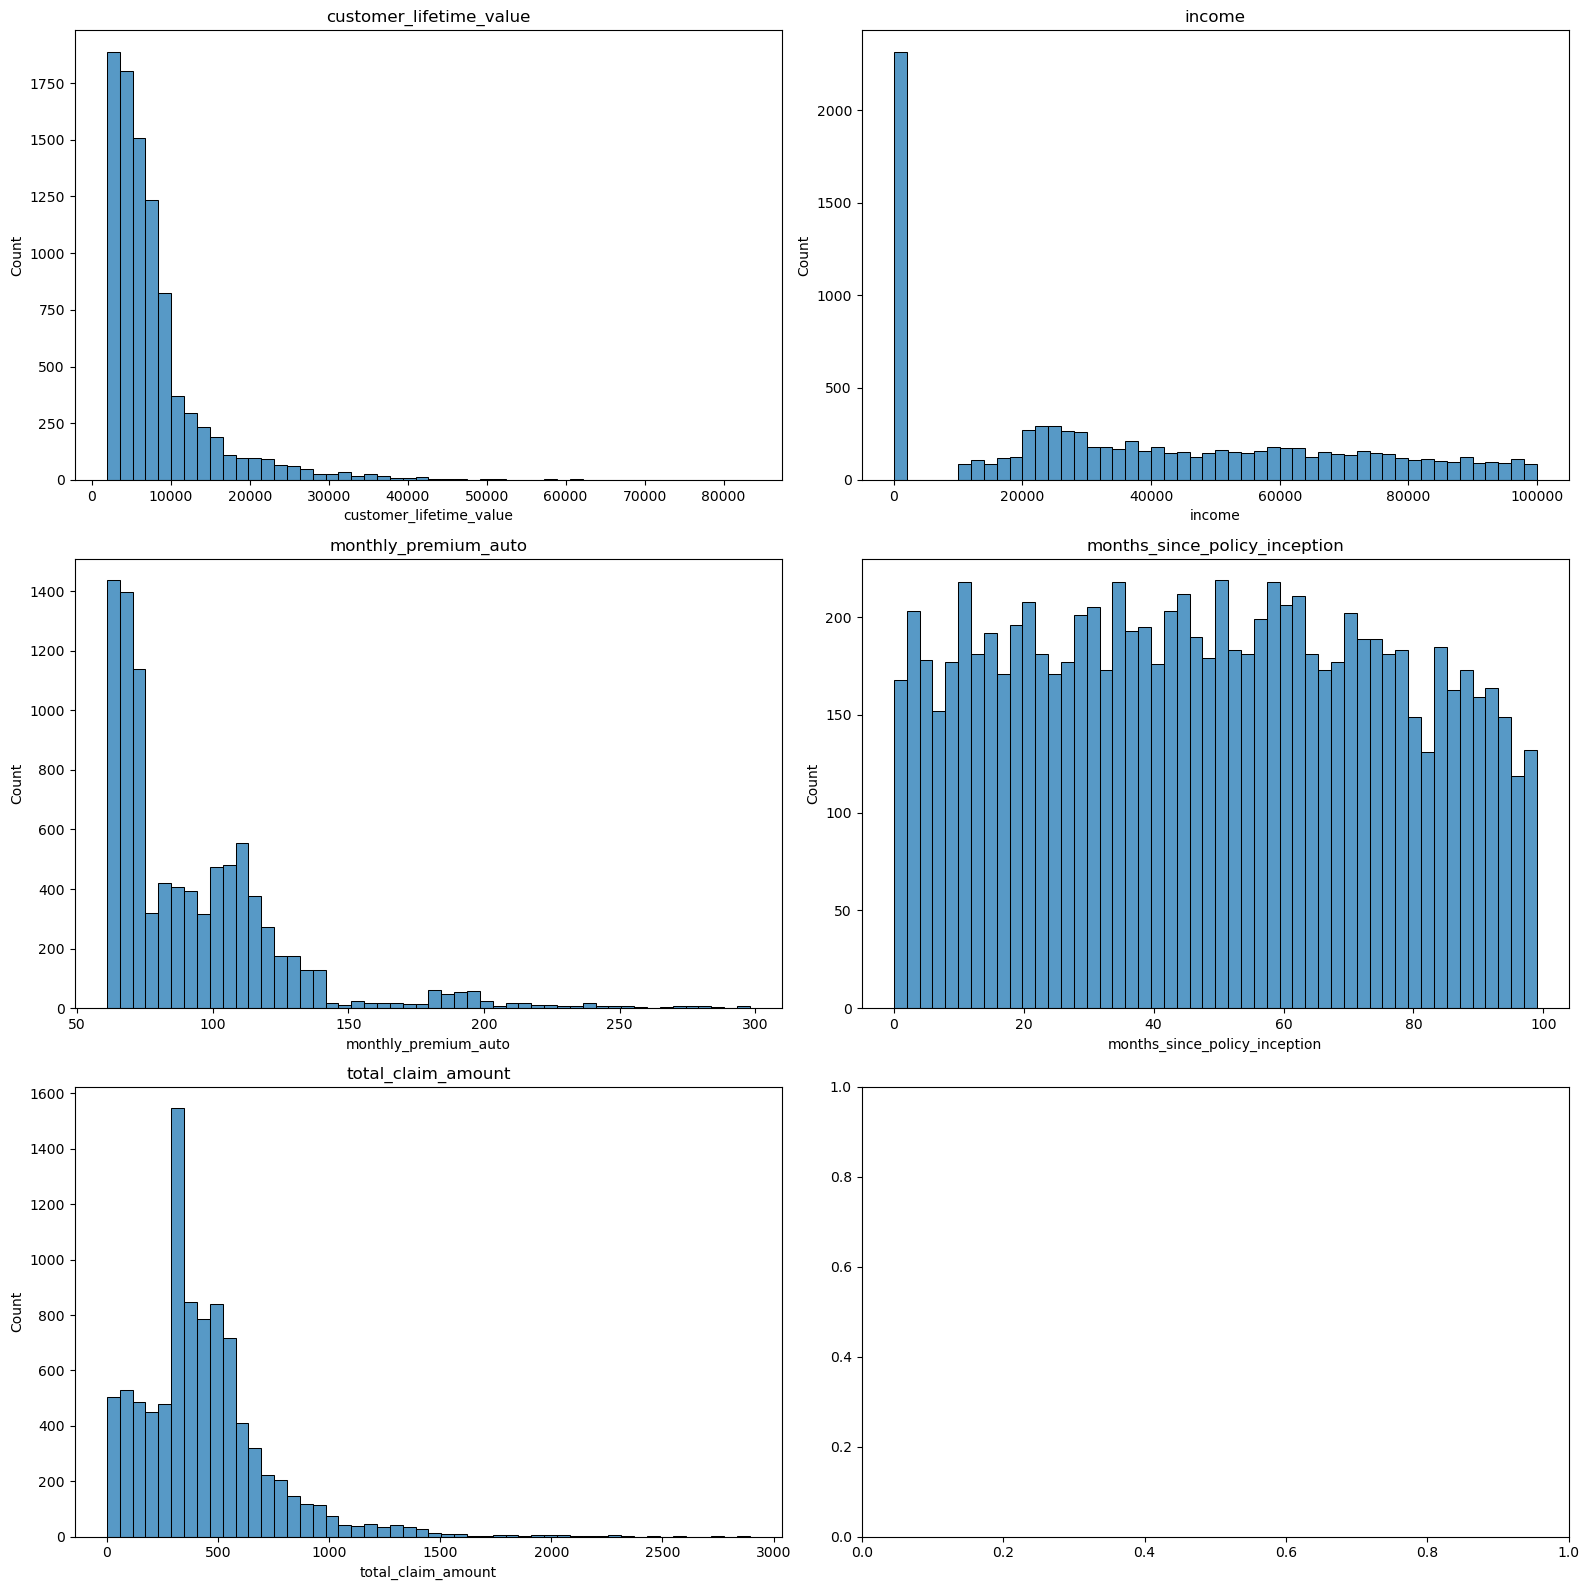

In [13]:
# Function to create a histogram for all cols in the continuous df

def hist_continuous(df: pd.DataFrame=continuous_df):
    '''
    Takes a dataframe and creates a histogram for each column.
    '''
    num_cols = df.shape[1]
    num_rows = num_cols // 2 + 1
    fig, axes = plt.subplots(num_rows, 2, figsize=(16, 16))
    axes = axes.flatten()
    for i, col in enumerate(df.columns):
        sns.histplot(df[col], ax=axes[i], bins=50)
        axes[i].set_title(col)
    plt.tight_layout()
    plt.show()
        
hist_continuous(continuous_df)

According to the histograms above:
- Income and months since policy inception look pretty symmetrical, aside from the large number of zeros in income
- The distributions of the rest of the columns look positively skewed and will most likely warrant a transformation

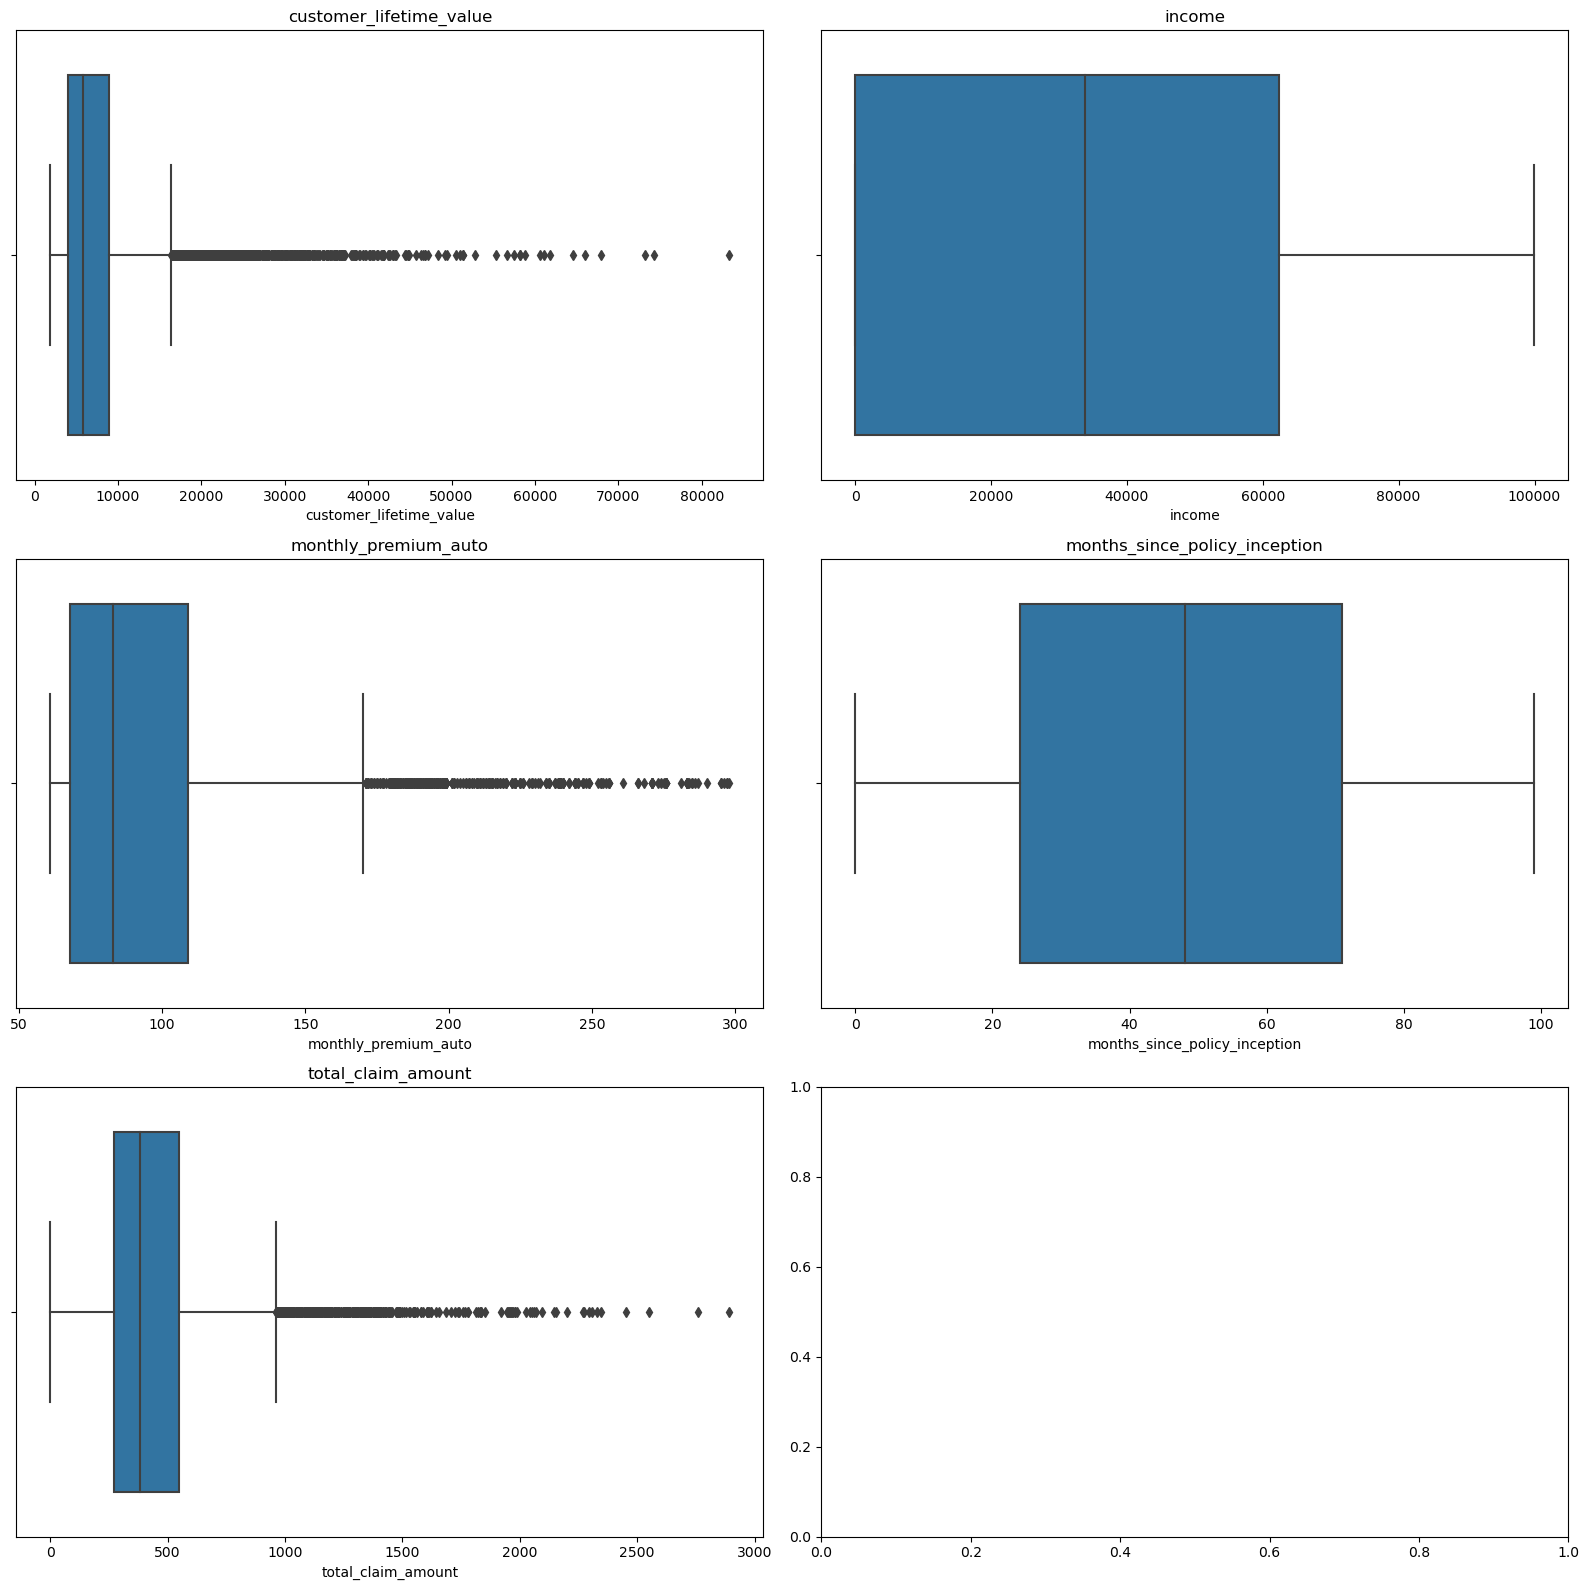

In [14]:
# Function to create a boxplot for each col in the continuous df and visualize outliers

def boxplot_continuous(df: pd.DataFrame=continuous_df):
    '''
    Takes a dataframe and creates a boxplot for each column.
    '''
    num_cols = df.shape[1]
    num_rows = num_cols // 2 + 1
    fig, axes = plt.subplots(num_rows, 2, figsize=(16, 16))
    axes = axes.flatten()
    for i, col in enumerate(df.columns):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(col)
    plt.tight_layout()
    plt.show()
        
boxplot_continuous(continuous_df)

Customer lifetime value and total claim amount seem to have a handful of outliers at the very end of the distribution, the rest of the values outside of the whiskers' default values are part of the column distribution, indicated by how dense and overlapped they are (not scarce and isolated). Another approach we could take is to create a pairplot to identify values that fall apart from the rest of the scatterplots when plotting two variables together.

## Lab Cleaning Categorical Data
1. Define a function that given a pandas DataFrame as input creates a seaborn countplot of each categorical column. Make sure to sort the bars by frequency ie: the most frequent values should be placed first. Hint: use .value_counts(). In addition, if the amount of unique values of a categorical column (cardinality) is six or more, the corresponding countplot should have the bars placed on the y-axis instead of the x-axis.
2. policy_type and policy columns are redundant, and what's worse policy column has a lot of possible unique values (high cardinality) which will be problematic when they will be dummified with an OneHotEncoder because we will increase a lot the number of columns in the dataframe. Drop the column policy_type and transform the column policy to three possible values: L1, L2, and L3 using a function.
3. Time dependency analysis. Use a seaborn line plot using the column effective_to_date to see if total_claim_amount is bigger at some specific dates. Use a figsize=(10,10)
4. To continue the analysis define an empty pandas DataFrame, and add the following new columns:
    - day with the day number of effective_to_date
    - day_name with the day NAME of effective_to_date
    - week with the week of effective_to_date
    - month with the month NAME of effective_to_date
    - total_claim_amount with total_claim_amount
5. Compute the total target column aggregated day_name rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_days)
6. Use a seaborn line plot to plot the previous series. Do you see some differences by day of the week?
7. Get the total number of claims by day of the week name and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)
8. Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()
9. Plot the median "target" by day of the week name using a seaborn barplot
10. What can you conclude from this analysis?
11. Compute the total target column aggregated month rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)
12. Can you do a monthly analysis given the output of the previous series? Why?
13. Define a function to remove the outliers of a numerical continuous column depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).
14. Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df.
15. Concatenate the continuous_cleaned_df, discrete_df, categorical_df, and the relevant column of time_df. After removing outliers the continuous_cleaned dataframe will have fewer rows (when you concat the individual dataframes using pd.concat()) the resulting dataframe will have NaN's because of the different sizes of each dataframe. Use pd.dropna() and .reset_index() to fix the final dataframe.
16. Reorder the columns of the dataframe to place 'total_claim_amount' as the last column.
17. Turn the response column values into (Yes=1/No=0).
18. Reduce the class imbalance in education by grouping together ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.
19. Reduce the class imbalance of the employmentstatus column grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.
20. Deal with column Gender turning the values into (1/0).
21. Now, deal with vehicle_class grouping together "Sports Car", "Luxury SUV", and "Luxury Car" into a common group called Luxury leaving the other values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.
22. Now it's time to deal with the categorical ordinal columns, assigning a numerical value to each unique value respecting the ìmplicit ordering. Encode the coverage: "Premium" > "Extended" > "Basic".
23. Encode the column employmentstatus as: "Employed" > "Inactive" > "Unemployed".
24. Encode the column location_code as: "Urban" > "Suburban" > "Rural".
25. Encode the column vehicle_size as: "Large" > "Medsize" > "Small".
26. Get a dataframe with the categorical nominal columns
27. Create a list of named levels which that has as many elements as categorical nominal columns. Each element must be another list with all the possible unique values of the corresponding categorical nominal column: ie:
levels = [ [col1_value1, col1_value2,...], [col2_value1, col2_value2,...], ...]
28. Instantiate an sklearn OneHotEncoder with drop set to first and categories to levels

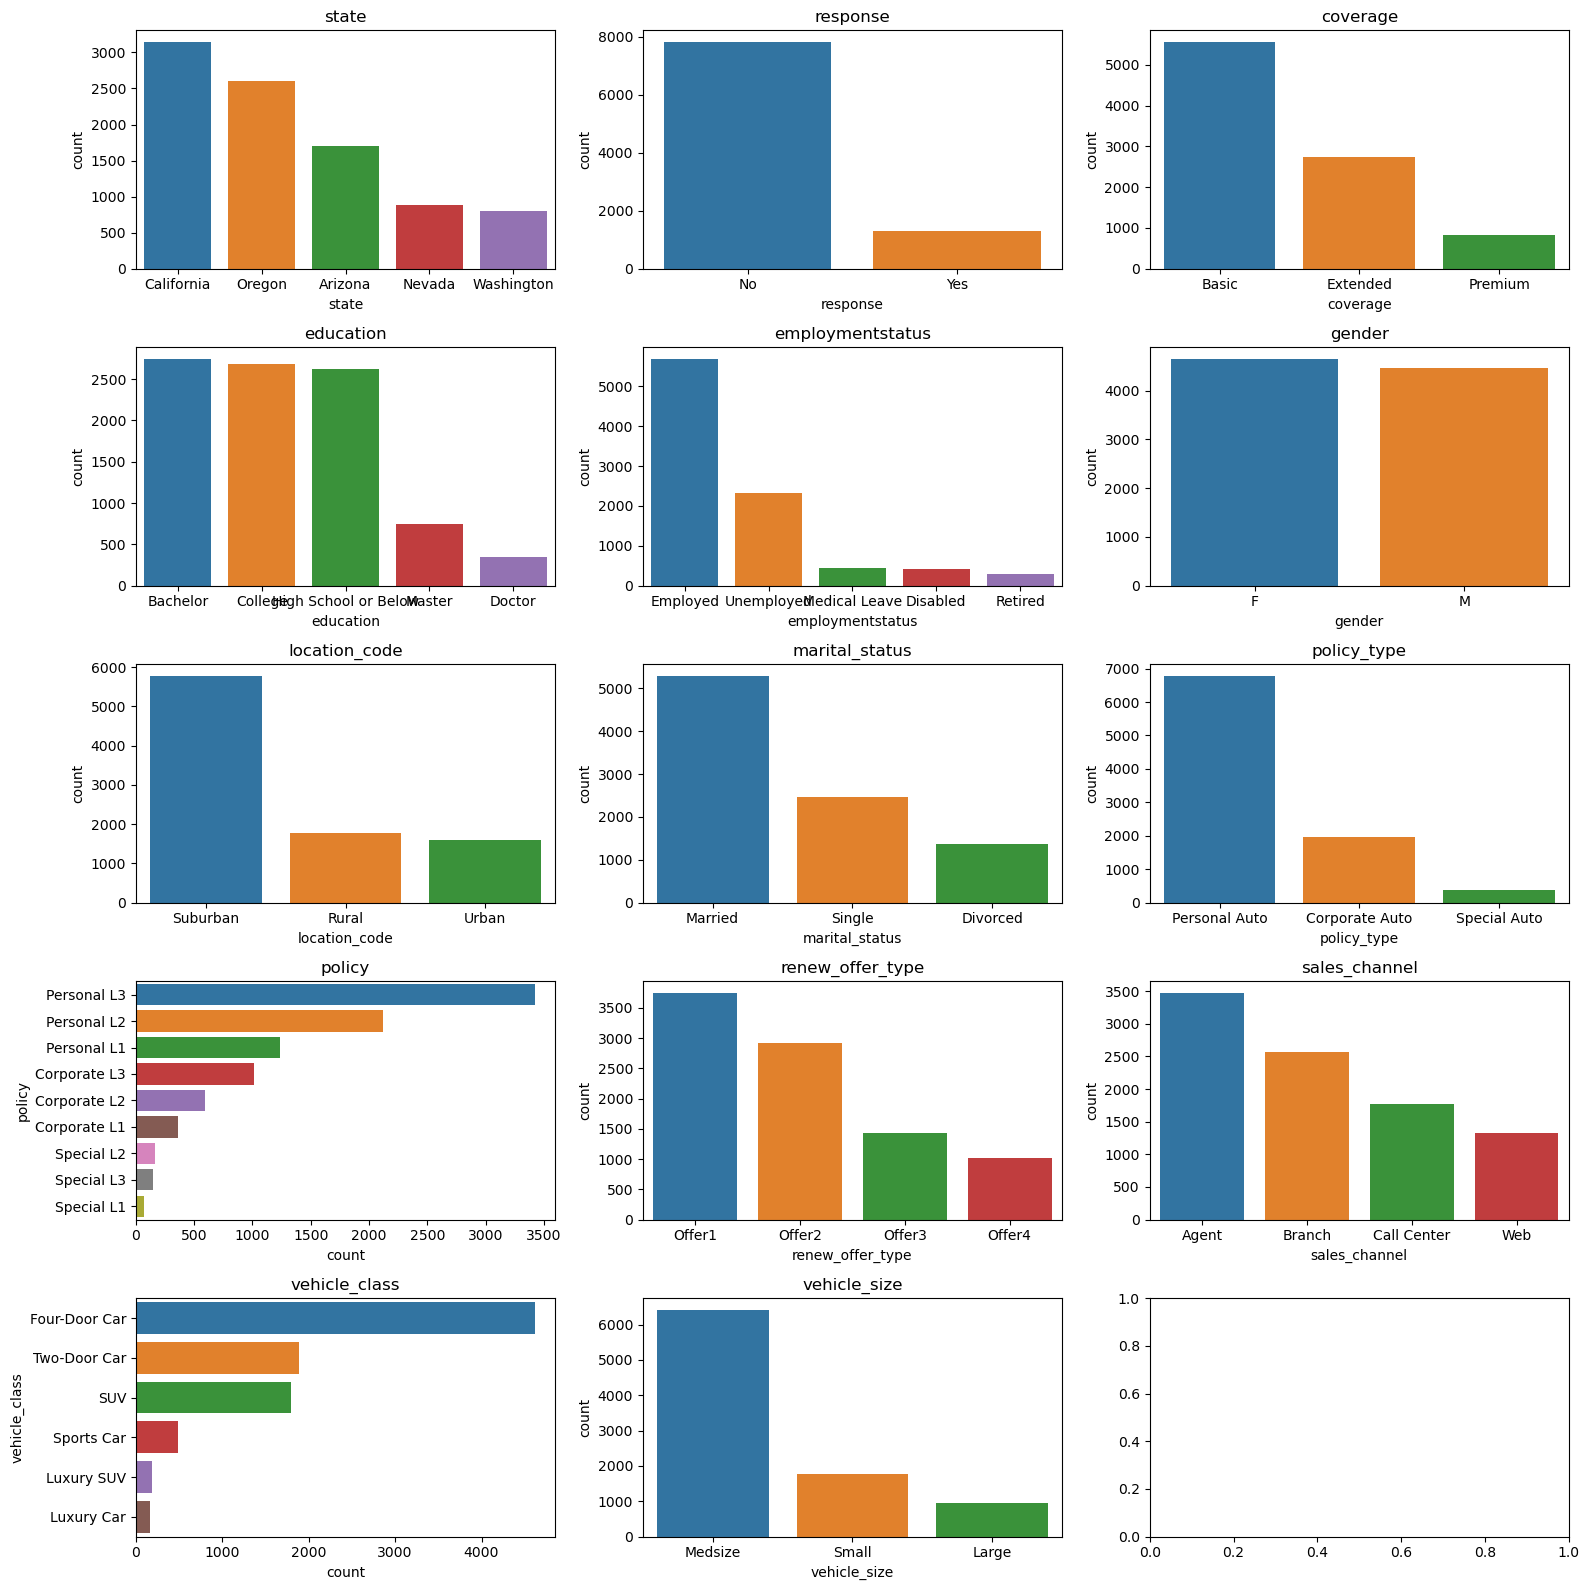

In [15]:
# 1. Defining function to create barplots to display categorical columns

def countplot_categorical(df: pd.DataFrame, threshold: int=5, fig_cols: int=3):
    
    '''
    - Takes a pandas dataframe
    - Creates another dataframe with the categorical columns (cols with data type == object)
    - Drops any column with different values in every row
    - Displays countplots for every column in a 3-col grid
    - If the col unique values are higher than 5, places the columns in the y axis
    '''
    
    df_cat = df.select_dtypes(include='object')
    
    for col in df_cat:
        if df[col].nunique() == len(df[col]):
            df_cat.drop(columns=col, inplace=True)
    
    num_cols = df_cat.shape[1]
    num_rows = num_cols // fig_cols + 1
    fig, axes = plt.subplots(num_rows, fig_cols, figsize=(16, 16))
    axes = axes.flatten()
    
    for i, col in enumerate(df_cat.columns):
        if df_cat[col].nunique() > threshold:
            sns.countplot(y=df_cat[col], ax=axes[i], order=df_cat[col].value_counts().index)
            axes[i].set_title(col)
        else:
            sns.countplot(x=df_cat[col], ax=axes[i], order=df_cat[col].value_counts().index)
            axes[i].set_title(col)
    
    plt.tight_layout()
    plt.show()

countplot_categorical(customer_df)

In [16]:
# 2. Dropping policy type column

customer_df_cat = customer_df_cat.drop(columns='policy_type')
customer_df_cat.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [17]:
# 2. Transforming policy column to 3 possible values: 'L1', 'L2' and 'L3'

mapping = {'Personal L1': 'L1', 'Corporate L1': 'L1', 'Special L1': 'L1',
          'Personal L2': 'L2', 'Corporate L2': 'L2', 'Special L2': 'L2',
          'Personal L3': 'L3', 'Corporate L3': 'L3', 'Special L3': 'L3'}

customer_df_cat['policy'] = customer_df_cat['policy'].replace(mapping)

customer_df_cat['policy'].unique()

array(['L3', 'L2', 'L1'], dtype=object)

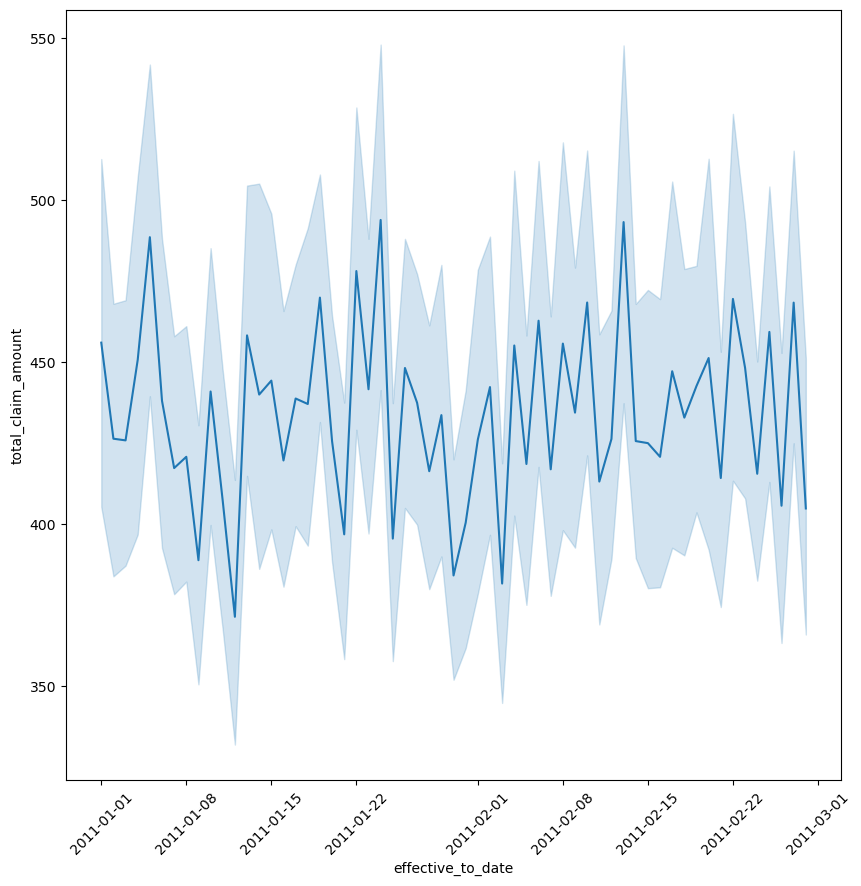

In [18]:
# 3. Line plot for date column

plt.subplots(figsize=(10, 10))

sns.lineplot(x='effective_to_date', y='total_claim_amount', data=customer_df)

plt.xticks(rotation=45)

plt.show()

We can see the total claim amount is higher around 3 dates:
- Around 3-4th January
- Around 23-24th January
- Around 13-14th February

In [19]:
# 4. Creating an empty df and adding new columns

date_df = pd.DataFrame()

date_df['day'] = customer_df['effective_to_date'].dt.day
date_df['day_name'] = customer_df['effective_to_date'].dt.strftime('%A')
date_df['week'] = customer_df['effective_to_date'].dt.strftime('%U')
date_df['month'] = customer_df['effective_to_date'].dt.strftime('%B')
date_df['total_claim_amount'] = customer_df['total_claim_amount']

date_df.head()

,day,day_name,week,month,total_claim_amount
0,24,Thursday,08,February,384.811147
1,31,Monday,05,January,1131.464935
2,19,Saturday,07,February,566.472247
3,20,Thursday,03,January,529.881344
4,3,Thursday,05,February,138.130879


In [20]:
# 5. Grouping claim amount by day name and reordering index

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

total_claimed_dayname = round(date_df.groupby('day_name')['total_claim_amount'].sum().reindex(index=weekdays), 2)

total_claimed_dayname

day_name
Monday       655689.71
Tuesday      502518.93
Wednesday    541563.05
Thursday     541820.80
Friday       533658.79
Saturday     608060.10
Sunday       581655.66
Name: total_claim_amount, dtype: float64

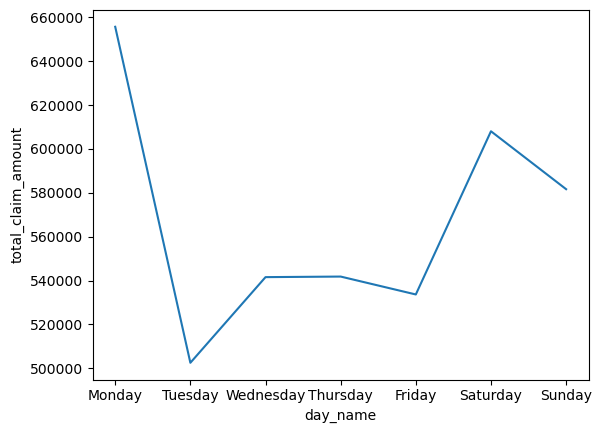

In [21]:
# 6. Lineplot of previous series

sns.lineplot(total_claimed_dayname)
plt.show()

We can see a large spike of claim amount on Mondays and on Saturdays/Sundays to a lesser extent.

In [22]:
# 7. Grouping number of claims by day name and reordering index

count_claims_dayname = date_df.groupby('day_name')['total_claim_amount'].count().reindex(index=weekdays)

count_claims_dayname

day_name
Monday       1530
Tuesday      1162
Wednesday    1221
Thursday     1249
Friday       1245
Saturday     1397
Sunday       1330
Name: total_claim_amount, dtype: int64

In [23]:
# 8. Median claim amount by day of the week

median_claimed_dayname = date_df.groupby('day_name')['total_claim_amount'].median().sort_values(ascending=False)

median_claimed_dayname

day_name
Thursday     395.328407
Wednesday    392.235698
Monday       385.735705
Sunday       383.721164
Saturday     379.200000
Tuesday      378.490829
Friday       371.803029
Name: total_claim_amount, dtype: float64

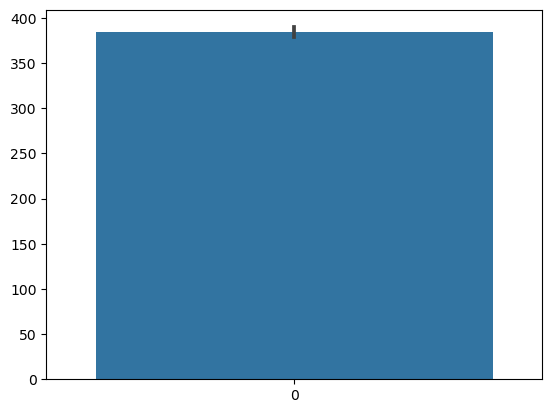

In [24]:
# 9. Barplot for median claimed by day of the week

sns.barplot(median_claimed_dayname)
plt.show()

#### 10. Conclusions from the analysis

- It appears that the median amount per claim by day of the week does not vary much
- The days with the most amount claimed and the most number of claims are Mondays and weekends
- The median not varying that much could mean that in those 3 days with higher total amount claimed, the claims in higher amount percentiles are bigger than in other days

In [25]:
# 11. Grouping total claimed amount by month and reordering index

months = ['January', 'February']

total_claimed_month = round(date_df.groupby('month')['total_claim_amount'].sum().reindex(index=months), 2)

total_claimed_month

month
January     2117142.86
February    1847824.19
Name: total_claim_amount, dtype: float64

#### 12. Conclusions from the analysis

- An analysis could be done comparing January and February, being the total claimed in January about 10% higher
- The analysis would likely be incomplete as the dataset does not contain data for the rest of the year

In [26]:
# 13. Defining function to remove outliers 3 std away from the mean

from scipy.stats import zscore

def remove_outliers(df: pd.DataFrame, threshold: float=3) -> pd.DataFrame:
    '''
    Takes a dataframe and removes rows that have values that are 3 (threshold default value) standard deviations away
    from the mean. 
    '''
    # Calculating z-scores for all data
    z_scores = zscore(df)
    
    # Creating bool mask to identify outliers
    mask = (abs(z_scores) > threshold).any(axis=1)
    
    clean_df = df[~mask]
    return clean_df

In [27]:
# 14. Applying remove_outliers to continuous_df

print(f'Initial rows: {continuous_df.shape[0]}')

continuous_clean_df = remove_outliers(continuous_df)

print(f'Final rows: {continuous_clean_df.shape[0]}')

Initial rows: 9134
Final rows: 8670


In [28]:
# 15. Concatenating all dataframes

date_df = date_df.drop(columns=['total_claim_amount', 'day', 'week'])

concat_df = pd.concat([continuous_clean_df, discrete_df, customer_df_cat, date_df], axis=1)

concat_df = concat_df.dropna(how='any').reset_index(drop=True)

concat_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,...,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day_name,month
0,2763.519279,56274.0,69.0,5.0,384.811147,32,0,1,Washington,No,...,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,Thursday,February
1,6979.535903,0.0,94.0,42.0,1131.464935,13,0,8,Arizona,No,...,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize,Monday,January
2,12887.431650,48767.0,108.0,38.0,566.472247,18,0,2,Nevada,No,...,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,Saturday,February
3,7645.861827,0.0,106.0,65.0,529.881344,18,0,7,California,No,...,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize,Thursday,January
4,2813.692575,43836.0,73.0,44.0,138.130879,12,0,1,Washington,No,...,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize,Thursday,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8665,23405.987980,71941.0,73.0,89.0,198.234764,18,0,2,California,No,...,M,Urban,Married,L1,Offer2,Web,Four-Door Car,Medsize,Thursday,February
8666,3096.511217,21604.0,79.0,28.0,379.200000,14,0,1,California,Yes,...,F,Suburban,Divorced,L3,Offer1,Branch,Four-Door Car,Medsize,Saturday,February
8667,8163.890428,0.0,85.0,37.0,790.784983,9,3,2,California,No,...,M,Suburban,Single,L2,Offer1,Branch,Four-Door Car,Medsize,Sunday,February
8668,7524.442436,21941.0,96.0,3.0,691.200000,34,0,3,California,No,...,M,Suburban,Married,L2,Offer3,Branch,Four-Door Car,Large,Thursday,February


In [29]:
# 16. Reordering columns to place total claim amount as the last one

col_last = 'total_claim_amount'

reordered_df = pd.concat([concat_df.drop(columns=col_last), concat_df[col_last]], axis=1)

reordered_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,coverage,...,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day_name,month,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,32,0,1,Washington,No,Basic,...,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,Thursday,February,384.811147
1,6979.535903,0.0,94.0,42.0,13,0,8,Arizona,No,Extended,...,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize,Monday,January,1131.464935
2,12887.431650,48767.0,108.0,38.0,18,0,2,Nevada,No,Premium,...,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,Saturday,February,566.472247
3,7645.861827,0.0,106.0,65.0,18,0,7,California,No,Basic,...,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize,Thursday,January,529.881344
4,2813.692575,43836.0,73.0,44.0,12,0,1,Washington,No,Basic,...,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize,Thursday,February,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8665,23405.987980,71941.0,73.0,89.0,18,0,2,California,No,Basic,...,Urban,Married,L1,Offer2,Web,Four-Door Car,Medsize,Thursday,February,198.234764
8666,3096.511217,21604.0,79.0,28.0,14,0,1,California,Yes,Extended,...,Suburban,Divorced,L3,Offer1,Branch,Four-Door Car,Medsize,Saturday,February,379.200000
8667,8163.890428,0.0,85.0,37.0,9,3,2,California,No,Extended,...,Suburban,Single,L2,Offer1,Branch,Four-Door Car,Medsize,Sunday,February,790.784983
8668,7524.442436,21941.0,96.0,3.0,34,0,3,California,No,Extended,...,Suburban,Married,L2,Offer3,Branch,Four-Door Car,Large,Thursday,February,691.200000


In [30]:
# 17. Replacing values of response column with binary

mapping_dict = {'Yes': 1, 'No': 0}

reordered_df['response'] = reordered_df['response'].replace(mapping_dict)

reordered_df['response'].unique()

array([0, 1], dtype=int64)

In [31]:
# 18. Reducing class imbalance by grouping values in education column

mapping_dict = {'Master': 'Graduate', 'Doctor': 'Graduate'}

reordered_df['education'] = reordered_df['education'].replace(mapping_dict)

reordered_df['education'].unique()

array(['Bachelor', 'College', 'Graduate', 'High School or Below'],
      dtype=object)

In [32]:
# 19. Reducing class imbalance by grouping values in employmentstatus column

mapping_dict = {'Medical Leave': 'Inactive', 'Disabled': 'Inactive', 'Retired': 'Inactive'}

reordered_df['employmentstatus'] = reordered_df['employmentstatus'].replace(mapping_dict)

reordered_df['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Inactive'], dtype=object)

In [33]:
# 20. Replacing values in gender column with binary

mapping_dict = {'F': 1, 'M': 0}

reordered_df['gender'] = reordered_df['gender'].replace(mapping_dict)

reordered_df['gender'].unique()

array([1, 0], dtype=int64)

In [34]:
# 21. Reducing class imbalance by grouping values in vehicle_class column

mapping_dict = {'Sports Car': 'Luxury', 'Luxury SUV': 'Luxury', 'Luxury Car': 'Luxury'}

reordered_df['vehicle_class'] = reordered_df['vehicle_class'].replace(mapping_dict)

reordered_df['vehicle_class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury'], dtype=object)

In [35]:
# 22. Encoding coverage column in ordinal fashion

mapping_dict = {'Basic': 0, 'Extended': 1, 'Premium': 2}

reordered_df['coverage'] = reordered_df['coverage'].replace(mapping_dict)

reordered_df['coverage'].unique()

array([0, 1, 2], dtype=int64)

In [36]:
# 23. Encoding employmentstatus column in ordinal fashion

mapping_dict = {'Unemployed': 0, 'Inactive': 1, 'Employed': 2}

reordered_df['employmentstatus'] = reordered_df['employmentstatus'].replace(mapping_dict)

reordered_df['employmentstatus'].unique()

array([2, 0, 1], dtype=int64)

In [37]:
# 24. Encoding location_code column in ordinal fashion

mapping_dict = {'Rural': 0, 'Suburban': 1, 'Urban': 2}

reordered_df['location_code'] = reordered_df['location_code'].replace(mapping_dict)

reordered_df['location_code'].unique()

array([1, 0, 2], dtype=int64)

In [38]:
# 25. Encoding vehicle_size column in ordinal fashion

mapping_dict = {'Small': 0, 'Medsize': 1, 'Large': 2}

reordered_df['vehicle_size'] = reordered_df['vehicle_size'].replace(mapping_dict)

reordered_df['vehicle_size'].unique()

array([1, 0, 2], dtype=int64)

In [39]:
# 26. Creating a dataframe with the categorical nominal columns

categorical_nominal = ['state', 'education', 'marital_status', 'policy', 'renew_offer_type', 'sales_channel',
                       'vehicle_class', 'day_name', 'month']

df_cat_nom = reordered_df[categorical_nominal]

df_cat_nom.head()

,state,education,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,day_name,month
0,Washington,Bachelor,Married,L3,Offer1,Agent,Two-Door Car,Thursday,February
1,Arizona,Bachelor,Single,L3,Offer3,Agent,Four-Door Car,Monday,January
2,Nevada,Bachelor,Married,L3,Offer1,Agent,Two-Door Car,Saturday,February
3,California,Bachelor,Married,L2,Offer1,Call Center,SUV,Thursday,January
4,Washington,Bachelor,Single,L1,Offer1,Agent,Four-Door Car,Thursday,February


In [40]:
# 27. List of named levels for one hot encoding categories

# levels = []

# for col in df_cat_nom.columns:
#     unique_values = df_cat_nom[col].unique().tolist()
#     sublist = [f'{col}_{value}' for value in unique_values]
#     levels.append(sublist)

# levels

# THIS DOES NOT WORK WITH THE ONEHOTENCODER EVEN THOUGH IT IS WHAT WAS ASKED IN THE LAB README
# I HAD TO REMOVE THE COLNAME AND THE UNDERSCORE

In [41]:
# 27. List of named levels for one hot encoding categories

levels = []

for col in df_cat_nom.columns:
    unique_values = df_cat_nom[col].unique().tolist()
    sublist = [f'{value}' for value in unique_values]
    levels.append(sublist)

levels

[['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
 ['Bachelor', 'College', 'Graduate', 'High School or Below'],
 ['Married', 'Single', 'Divorced'],
 ['L3', 'L2', 'L1'],
 ['Offer1', 'Offer3', 'Offer2', 'Offer4'],
 ['Agent', 'Call Center', 'Web', 'Branch'],
 ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury'],
 ['Thursday',
  'Monday',
  'Saturday',
  'Tuesday',
  'Wednesday',
  'Sunday',
  'Friday'],
 ['February', 'January']]

In [42]:
# 28. Instantiate a OneHotEncoder with drop='first' and categories=levels

from sklearn.preprocessing import OneHotEncoder

ohencoder = OneHotEncoder(drop='first', categories=levels)

## Lab Comparing Regression Models

1. Define X and y
2. Import sklearn train_test_split and separate the data. Set test_size=0.30 and random_state=31
3. Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)
4. Encode the categorical variables X_train_cat and X_test_cat using the OneHotEncoder setup in the previous lab. Remember to use .toarray() after .transform() to endup with a numpy array. Next, cast the resulting numpy arrays into pandas DataFrames. Make sure that the column names of the new dataframes are correctly setup using encoder.get_feature_names_out() and the same indexes of X_train_cat and X_test_cat
5. Use X_train_num to fit a power transformer. Transform BOTH X_train_num and X_test_num. Next, cast the resulting numpy arrays as pandas dataframes. Make sure to set the correct columns names and to use the same indexes of X_train_num and X_test_num. Name the final resulting dataframes as: X_train_num_transformed_df and X_test_num_transformed_df
6. Concat X_train_num_transformed_df and X_train_cat_encoded_df into X_train_new and X_test_num_transformed_df and X_test_cat_encoded_df into X_test_new
7. Fit a MinMax scaler using X_train_new and transform X_train_new and X_test_new. Create new pandas dataframes from the resulting numpy arrays. Remember to set the correct columns names and indexes. Name the resulting dataframes as: X_train_new_scaled_df and X_test_new_scaled_df
8. Train a simple linear regression model using X_train_new_scaled_df, and get the predictions for the train and test sets
9. Create a function that given a model prediction and real values returns a pandas dataframe with the following table:
    - MAE
    - MSE
    - RMSE
    - MAPE
    - R2
10. Evaluate the linear model predictions using the previous function on the TRAIN and TEST sets
11. Now define a function that takes as an input: list of models, X_train and y_train to train several model (with default values) so we can train a lot of them without repeating code. The function must return the list of trained models.
12. Use the function to train the following models (with default settings):
    - LinearRegressor
    - KNeighborsRegressor
    - MLPRegressor
13. Evaluate the models with the function created earlier in the TRAIN and TEST sets. Which model performs best with the default options?

In [43]:
# 1. Define X and y

y = reordered_df['total_claim_amount']
X = reordered_df.drop(columns='total_claim_amount')

In [44]:
# 2. Separate the data into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6069, 22)
(2601, 22)
(6069,)
(2601,)


In [45]:
# 3. Separating X_train and X_test into numerical and categorical

X_train_num = X_train.select_dtypes(include='number').drop(columns=['response', 'coverage', 'employmentstatus', 'gender', 'location_code', 'vehicle_size'])
X_test_num = X_test.select_dtypes(include='number').drop(columns=['response', 'coverage', 'employmentstatus', 'gender', 'location_code', 'vehicle_size'])

X_train_cat = X_train.select_dtypes(include='object')
X_test_cat = X_test.select_dtypes(include='object')

X_train_other = X_train[['response', 'coverage', 'employmentstatus', 'gender', 'location_code', 'vehicle_size']]
X_test_other = X_test[['response', 'coverage', 'employmentstatus', 'gender', 'location_code', 'vehicle_size']]

In [46]:
X_train_cat

,state,education,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,day_name,month
4781,California,High School or Below,Married,L2,Offer2,Agent,Two-Door Car,Saturday,January
2526,California,College,Single,L1,Offer1,Agent,Four-Door Car,Thursday,January
2423,California,High School or Below,Married,L2,Offer2,Branch,Four-Door Car,Saturday,January
6641,Oregon,High School or Below,Single,L2,Offer3,Agent,Two-Door Car,Friday,January
3677,Nevada,High School or Below,Single,L3,Offer3,Agent,Four-Door Car,Monday,January
...,...,...,...,...,...,...,...,...,...
5372,California,Graduate,Divorced,L2,Offer2,Call Center,Two-Door Car,Saturday,February
28,Arizona,College,Single,L3,Offer1,Call Center,Four-Door Car,Wednesday,February
826,Arizona,Bachelor,Married,L3,Offer2,Web,Four-Door Car,Tuesday,January
3735,Nevada,Bachelor,Divorced,L1,Offer1,Agent,Four-Door Car,Sunday,February


In [47]:
# 4. Encoding X_train_cat and X_test cat with the encoder from the previous lab

X_train_cat_encoded = ohencoder.fit_transform(X_train_cat).toarray()
X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded, columns=ohencoder.get_feature_names_out(), index=X_train_cat.index)

X_test_cat_encoded = ohencoder.transform(X_test_cat).toarray()
X_test_cat_encoded = pd.DataFrame(X_test_cat_encoded, columns=ohencoder.get_feature_names_out(), index=X_test_cat.index)

display(X_train_cat_encoded.head())
display(X_test_cat_encoded.head())

,state_Arizona,state_Nevada,state_California,state_Oregon,education_College,education_Graduate,education_High School or Below,marital_status_Single,marital_status_Divorced,policy_L2,...,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury,day_name_Monday,day_name_Saturday,day_name_Tuesday,day_name_Wednesday,day_name_Sunday,day_name_Friday,month_January
4781,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2526,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2423,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6641,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3677,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


,state_Arizona,state_Nevada,state_California,state_Oregon,education_College,education_Graduate,education_High School or Below,marital_status_Single,marital_status_Divorced,policy_L2,...,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury,day_name_Monday,day_name_Saturday,day_name_Tuesday,day_name_Wednesday,day_name_Sunday,day_name_Friday,month_January
8501,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
187,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3639,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7120,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [48]:
# 5. Transforming X_train_cat and X_test cat with the PowerTransformer

from sklearn.preprocessing import PowerTransformer

power_transformer = PowerTransformer()

X_train_num_trans = power_transformer.fit_transform(X_train_num)
X_train_num_trans = pd.DataFrame(X_train_num_trans, columns=X_train_num.columns, index=X_train_num.index)

X_test_num_trans = power_transformer.transform(X_test_num)
X_test_num_trans = pd.DataFrame(X_test_num_trans, columns=X_test_num.columns, index=X_test_num.index)

display(X_train_num_trans.head())
display(X_test_num_trans.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies
4781,1.865510,1.052497,-0.667982,-1.191887,0.317418,-0.507894,-0.060928
2526,-0.103486,1.093370,-0.977917,0.389688,1.523199,-0.507894,1.130043
2423,-1.418971,0.933212,-0.977917,0.421971,0.404090,-0.507894,-1.136193
6641,0.103935,-1.642693,0.286472,1.097570,0.228594,-0.507894,1.316016
3677,-0.875178,0.331249,0.451236,1.527755,-1.680546,-0.507894,-1.136193


,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies
8501,-0.022998,0.109433,-0.667982,1.068113,0.228594,-0.507894,0.878092
187,0.546609,1.022941,-0.977917,-0.520102,-0.712182,2.026025,-0.060928
3639,-1.466357,1.092757,-1.062400,0.486070,0.228594,-0.507894,-1.136193
2507,0.612614,0.171939,-0.528021,0.057401,-1.127045,-0.507894,-0.060928
7120,-1.523230,0.716244,-0.977917,-2.004233,-0.841324,2.026025,-1.136193


In [49]:
# 6. Concatenating dataframes into X_train_new and X_test_new

X_train_new = pd.concat([X_train_other, X_train_cat_encoded, X_train_num_trans], axis=1)
X_test_new = pd.concat([X_test_other, X_test_cat_encoded, X_test_num_trans], axis=1)

print(X_train_new.shape)
print(X_test_new.shape)

(6069, 40)
(2601, 40)


In [50]:
# 7. Scaling X with MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train_new)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_new.columns, index=X_train_new.index)

X_test_scaled = scaler.transform(X_test_new)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_new.columns, index=X_test_new.index)

display(X_train_scaled_df.head())
display(X_test_scaled_df.head())

,response,coverage,employmentstatus,gender,location_code,vehicle_size,state_Arizona,state_Nevada,state_California,state_Oregon,...,day_name_Sunday,day_name_Friday,month_January,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies
4781,1.0,0.0,1.0,1.0,0.5,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.906258,0.978658,0.236125,0.242316,0.628760,0.0,0.383548
2526,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.466154,0.993500,0.151676,0.665606,0.963660,0.0,0.808368
2423,0.0,0.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.172121,0.935344,0.151676,0.674246,0.652833,0.0,0.000000
6641,0.0,0.5,0.0,0.0,0.5,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.512516,0.000000,0.496187,0.855062,0.604089,0.0,0.874705
3677,0.0,0.5,1.0,1.0,0.5,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.293668,0.716764,0.541080,0.970196,0.073834,0.0,0.000000


,response,coverage,employmentstatus,gender,location_code,vehicle_size,state_Arizona,state_Nevada,state_California,state_Oregon,...,day_name_Sunday,day_name_Friday,month_January,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies
8501,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.484145,0.636220,0.236125,0.847178,0.604089,0.00000,0.718497
187,0.0,0.0,1.0,1.0,0.5,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.611462,0.967926,0.151676,0.422111,0.342793,0.99849,0.383548
3639,0.0,0.0,1.0,1.0,0.0,0.5,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.161530,0.993277,0.128657,0.691401,0.604089,0.00000,0.000000
2507,1.0,0.0,0.5,1.0,0.5,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.626215,0.658916,0.274260,0.576673,0.227566,0.00000,0.383548
7120,0.0,0.0,1.0,0.0,0.5,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.148818,0.856561,0.151676,0.024902,0.306924,0.99849,0.000000


In [51]:
# 8. Training simple linear regression model and getting predictions for train and test sets

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train_scaled_df, y_train)

y_train_pred = lr.predict(X_train_scaled_df)
y_test_pred = lr.predict(X_test_scaled_df)

print(y_train_pred[:5])
print(y_test_pred[:5])

[228.88244419 163.59139608 136.12658303 576.13485471 472.64999506]
[143.04677611 218.50089537 129.96262626 343.60353456 281.73692531]


In [52]:
# 9. Creating a function that presents error metrics in a dataframe with the specified format

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

def error_metrics_df(y_test, y_test_pred, y_train, y_train_pred) -> pd.DataFrame:
    '''
    - Takes y_test values y_test predicted values, y_train values, y_train predicted values
    - Calculates error metrics (MAE, MSE, RMSE, MAPE, R2)
    - Outputs a dataframe with values for each metric and for each set
    '''
    
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
    test_r2score = r2_score(y_test, y_test_pred)
    test_metrics = [test_mae, test_mse, test_rmse, test_mape, test_r2score]
    
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    train_r2score = r2_score(y_train, y_train_pred)
    train_metrics = [train_mae, train_mse, train_rmse, train_mape, train_r2score]
    
    df = pd.DataFrame(index=['MAE', 'MSE', 'RMSE', 'MAPE', 'R2'])
    df['test_value'] = test_metrics
    df['train_value'] = train_metrics
    
    return df

In [53]:
# 10. Evaluate the linear model predictions in train and test sets

error_metrics_df(y_test, y_test_pred, y_train, y_train_pred)

,test_value,train_value
MAE,121.760754,123.367697
MSE,25059.153528,26015.177135
RMSE,158.300832,161.292210
MAPE,1.589311,1.576809
R2,0.522185,0.527619


In [54]:
# 11. Define a function to train several models with default values

def regression_model_trainer(models: list, X_train, y_train) -> list:
    '''
    - Takes a list of models, X_train and y_train sets
    - Fits the models according to the data
    - Outputs a list with the trained models
    '''
    
    trained_models = []
    
    for model in models:
        if model == MLPRegressor():
            model.fit(X_train, y_train, random_state=13)
            trained_models.append(model)
        else:
            model.fit(X_train, y_train)
            trained_models.append(model)
    return trained_models

In [55]:
# 12. Using the previous function to train three regression models

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

models = [LinearRegression(), KNeighborsRegressor(), MLPRegressor()]

trained_models = regression_model_trainer(models, X_train_scaled_df, y_train)
trained_models

C:\Users\Juan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[LinearRegression(), KNeighborsRegressor(), MLPRegressor()]

In [56]:
# 13. Evaluating models with the error metrics function

metrics_dfs = []

for model in trained_models:
    y_train_pred = model.predict(X_train_scaled_df)
    y_test_pred = model.predict(X_test_scaled_df)
    print(f'Error metrics for {model}:')
    display(error_metrics_df(y_test, y_test_pred, y_train, y_train_pred))
    print('\n\n')

Error metrics for LinearRegression():


,test_value,train_value
MAE,121.760754,123.367697
MSE,25059.153528,26015.177135
RMSE,158.300832,161.292210
MAPE,1.589311,1.576809
R2,0.522185,0.527619





Error metrics for KNeighborsRegressor():


,test_value,train_value
MAE,133.260580,106.116215
MSE,33059.008752,21558.571719
RMSE,181.821365,146.828375
MAPE,2.070335,1.693423
R2,0.369648,0.608542





Error metrics for MLPRegressor():


,test_value,train_value
MAE,109.319253,111.249663
MSE,21134.079826,22283.133423
RMSE,145.375651,149.275361
MAPE,1.275765,1.301158
R2,0.597026,0.595385


- The Multi Layer Perceptron Regressor has the best performance out of all three models with the default parameters
- The KNN Regressor has substantially better performance in train than in test, which suggest some degree of overfitting
- The Linear Regression model has around 20% worse performance than the MLPRegressor, but it outperforms the KNN model in the test set